# Lab 3: Training Deep Recurrent Neural Network


## Lab Instruction - Emojify

In this lab, you will learn to train a deep Recurrent neural network using Keras library with Tensorflow backend. Your task is to do the sentimental analysis which you will predict the emoji that represent the emotion in each sentence.


In [1]:
# Import require library
from keras import *
from keras.preprocessing import text
from keras.preprocessing import sequence

In [2]:
from sklearn.model_selection import train_test_split

import _utils as fn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read data

In [3]:
# import data
df = pd.read_csv('emoji_data.csv')
df.describe()

,emoji
count,7480.000000
mean,2.977273
std,1.999269
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,6.000000


In [4]:
df.head()

,sentence,emoji
0,"During the period of falling in love, each tim...",0
1,When I was involved in a traffic accident.,1
2,When I was driving home after several days of...,2
3,When I lost the person who meant the most to me.,3
4,The time I knocked a deer down - the sight of ...,4


In [5]:
x = df['sentence'].values
y = df['emoji'].values

In [6]:
x[0]

'During the period of falling in love, each time that we met and especially when we had not met for a long time.'

In [7]:
y[0]

0

### Split train test

In [8]:
# Split train test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,stratify=y,random_state=0)
# Split train validate
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size =0.3,stratify=y,random_state=0)

Text(0.5, 1.0, 'y val')

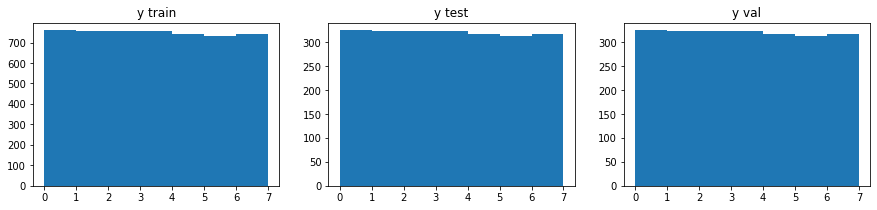

In [9]:
# Plot target distribution
# same distribution
fig,ax =plt.subplots(1,3,figsize=(15,3))

bins = [0,1,2,3,4,5,6,7]

ax[0].hist(y_train,bins=bins)
ax[0].set_title('y train')
ax[1].hist(y_test,bins=bins)
ax[1].set_title('y test')
ax[2].hist(y_val,bins=bins)
ax[2].set_title('y val')

### Preprocess data: Tokenizer & Padding

In [10]:
# Define parameter
max_word = 5000
maxlen = 20
max_features = 5000

In [11]:
# Define Tokenizer
tokenizer = text.Tokenizer(num_words = max_word) #define corpus(dictionary) to keep maximum number of words 
tokenizer.fit_on_texts(x_train)

In [12]:
tokenizer.word_index

{'i': 1,
 'the': 2,
 'a': 3,
 'to': 4,
 'my': 5,
 'and': 6,
 'was': 7,
 'when': 8,
 'of': 9,
 'in': 10,
 'had': 11,
 'me': 12,
 'that': 13,
 'for': 14,
 'not': 15,
 'with': 16,
 'it': 17,
 'at': 18,
 'on': 19,
 'very': 20,
 'he': 21,
 'friend': 22,
 'felt': 23,
 'an': 24,
 'her': 25,
 'she': 26,
 'we': 27,
 'one': 28,
 'as': 29,
 'about': 30,
 'this': 31,
 'from': 32,
 'after': 33,
 'by': 34,
 'time': 35,
 'did': 36,
 'were': 37,
 'but': 38,
 'out': 39,
 'him': 40,
 'who': 41,
 'because': 42,
 'been': 43,
 'his': 44,
 'got': 45,
 'have': 46,
 'some': 47,
 'which': 48,
 'would': 49,
 'day': 50,
 'home': 51,
 'friends': 52,
 'told': 53,
 'they': 54,
 'mother': 55,
 'up': 56,
 'do': 57,
 'so': 58,
 'be': 59,
 'person': 60,
 'there': 61,
 'school': 62,
 'people': 63,
 'went': 64,
 'saw': 65,
 'first': 66,
 'father': 67,
 'our': 68,
 'came': 69,
 'made': 70,
 'is': 71,
 'night': 72,
 'all': 73,
 'could': 74,
 'mine': 75,
 'girl': 76,
 'go': 77,
 'other': 78,
 'something': 79,
 'back': 80,
 

In [13]:
tokenizer.num_words

5000

In [14]:
# Preprocess data function
def preprocess_fn(data):
    sequeces = tokenizer.texts_to_sequences(data)
    #padding to make every sentence has the same length (max length)
    padding_sequences = sequence.pad_sequences(sequeces,maxlen = maxlen)
    
    return padding_sequences,sequeces

In [15]:
# Preprocess data
x_train,sequeces_x_train =  preprocess_fn(x_train)
x_val,sequeces_x_val = preprocess_fn(x_val)
x_test,sequeces_x_test = preprocess_fn(x_test)

In [16]:
x_train

array([[   1,   46,   43, ...,    1,  102,  116],
       [ 880,  225,    6, ...,    6,   45,   90],
       [   0,    0,    0, ...,  581,   24,  539],
       ...,
       [ 756,   16,  156, ..., 1273,   68, 2682],
       [ 168,   24,  137, ...,  524,    9,   17],
       [   0,    0,    0, ...,   19,    2,  795]])

In [17]:
#the number represent "word" in corpus(dict)
sequeces_x_train

[[18,
  402,
  1,
  46,
  43,
  2748,
  4,
  3856,
  48,
  178,
  3857,
  2749,
  373,
  4,
  235,
  217,
  879,
  6,
  93,
  1,
  102,
  116],
 [27,
  443,
  16,
  369,
  880,
  10,
  2,
  3858,
  9,
  3,
  136,
  17,
  310,
  881,
  13,
  78,
  880,
  225,
  6,
  225,
  1609,
  2,
  1834,
  16,
  119,
  831,
  8,
  1,
  7,
  538,
  1,
  282,
  1835,
  6,
  45,
  90],
 [156, 4, 581, 24, 539],
 [8,
  2750,
  832,
  120,
  2,
  2224,
  4,
  2225,
  2,
  582,
  1,
  23,
  3859,
  1,
  7,
  2751,
  38,
  1,
  2226,
  1,
  236,
  59,
  250,
  4,
  179,
  4,
  2,
  3860,
  6,
  3861],
 [1,
  7,
  1283,
  3,
  2752,
  2753,
  9,
  1836,
  150,
  3,
  1174,
  41,
  218,
  343,
  120,
  2,
  290,
  2,
  170,
  69,
  143,
  8,
  1,
  193,
  106,
  74,
  46,
  183],
 [8, 1, 7, 4, 946, 14, 5, 66, 503, 137, 1, 11, 170, 9, 3, 696, 1088],
 [1,
  1837,
  385,
  3,
  154,
  8,
  1,
  882,
  1,
  7,
  444,
  4,
  2,
  140,
  1,
  7,
  18,
  51,
  2,
  1420,
  7,
  232,
  276,
  1,
  124,
  7,
  459,
  

### Build a model with word embedding

In [78]:
# Define model
# simple rnn
rnn =models.Sequential()
# embedding -> vector input (text)
rnn.add(layers.Embedding(max_features,60,input_length=maxlen))

rnn.add(layers.SimpleRNN(60))

#fully-connected layer
rnn.add(layers.Dense(120,activation='sigmoid'))

rnn.add(layers.Dropout(0.25,name='dropout_1'))

rnn.add(layers.Dense(7,activation='softmax'))

In [79]:
# Compile model
rnn.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [80]:
# Show model structure
rnn.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 20, 60)            300000    
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 60)                7260      
                                                                 
 dense_24 (Dense)            (None, 120)               7320      
                                                                 
 dropout_1 (Dropout)         (None, 120)               0         
                                                                 
 dense_25 (Dense)            (None, 7)                 847       
                                                                 
Total params: 315,427
Trainable params: 315,427
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Define callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=1)

In [82]:
# Fit model
his =  rnn.fit(x_train,y_train,epochs=10, batch_size=64, validation_data=(x_val,y_val), callbacks=[early_stop])

Epoch 1/10
82/82 [==============================] - 2s 9ms/step - loss: 2.0060 - acc: 0.1520 - val_loss: 1.9021 - val_acc: 0.2086
Epoch 2/10
82/82 [==============================] - 1s 7ms/step - loss: 1.8119 - acc: 0.2649 - val_loss: 1.7234 - val_acc: 0.3048
Epoch 3/10
82/82 [==============================] - 1s 7ms/step - loss: 1.5651 - acc: 0.3850 - val_loss: 1.5737 - val_acc: 0.3966
Epoch 4/10
82/82 [==============================] - 1s 7ms/step - loss: 1.3249 - acc: 0.5031 - val_loss: 1.4965 - val_acc: 0.4398
Epoch 5/10
82/82 [==============================] - 1s 6ms/step - loss: 1.1175 - acc: 0.5968 - val_loss: 1.4844 - val_acc: 0.4603
Epoch 6/10
82/82 [==============================] - 1s 7ms/step - loss: 0.9145 - acc: 0.6923 - val_loss: 1.5858 - val_acc: 0.4857


Last train accuracy: 0.6923223733901978
Last validation accuracy: 0.48573973774909973


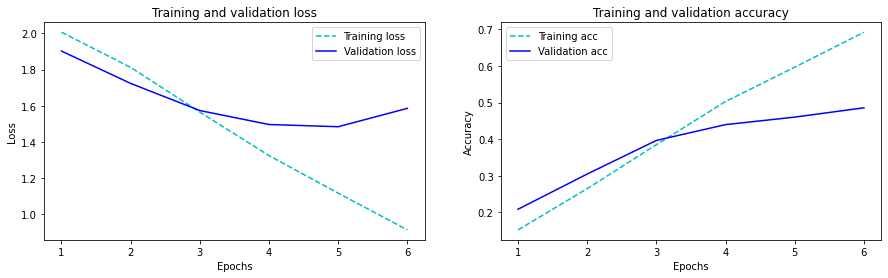

In [83]:
fn.show_result(his)

### LSTM

In [445]:
# Define model
lstm = models.Sequential()
lstm.add(layers.Embedding(max_features,64,input_length=maxlen))

# LSTM
lstm.add(layers.LSTM(64))
lstm.add(layers.Dense(256,activation='sigmoid'))

lstm.add(layers.Dense(7,activation='softmax'))

In [446]:
# Compile model
lstm.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [447]:
# Define callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [448]:
# Fit model
his2 =  lstm.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val), callbacks=[early_stop] )

Epoch 1/10
164/164 [==============================] - 6s 19ms/step - loss: 1.8827 - acc: 0.2108 - val_loss: 1.6612 - val_acc: 0.3480
Epoch 2/10
164/164 [==============================] - 3s 16ms/step - loss: 1.4225 - acc: 0.4456 - val_loss: 1.4243 - val_acc: 0.4612
Epoch 3/10
164/164 [==============================] - 3s 17ms/step - loss: 1.0041 - acc: 0.6247 - val_loss: 1.4114 - val_acc: 0.5027
Epoch 4/10
164/164 [==============================] - 3s 16ms/step - loss: 0.7394 - acc: 0.7347 - val_loss: 1.5082 - val_acc: 0.5053
Epoch 5/10
164/164 [==============================] - 3s 16ms/step - loss: 0.5682 - acc: 0.8054 - val_loss: 1.6484 - val_acc: 0.4978
Epoch 6/10
164/164 [==============================] - 3s 16ms/step - loss: 0.4210 - acc: 0.8610 - val_loss: 1.7880 - val_acc: 0.5004


### Evaluate Model
Baseline of the model is 14.28% (Random prediction)

In [431]:
# Preprocess test data
rnn.evaluate(x_test,y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.5858 - acc: 0.4857


[1.5857948064804077, 0.48573973774909973]

In [432]:
# Evaluate model with test data

In [433]:
# Show confusino matrix and prediction report
fn.evaluation_report(rnn,x_test,y_test)

[[227  20   8  31   9  23   7]
 [ 39 193   8  12  30  32   9]
 [ 26  15  98  25  62  35  63]
 [ 55  19  27 156  24  25  18]
 [ 29  36  30  17 152  25  28]
 [ 36  25  28  18  18 116  73]
 [ 18  18  32  17  20  64 148]]
              precision    recall  f1-score   support

           0       0.53      0.70      0.60       325
           1       0.59      0.60      0.59       323
           2       0.42      0.30      0.35       324
           3       0.57      0.48      0.52       324
           4       0.48      0.48      0.48       317
           5       0.36      0.37      0.37       314
           6       0.43      0.47      0.45       317

    accuracy                           0.49      2244
   macro avg       0.48      0.49      0.48      2244
weighted avg       0.48      0.49      0.48      2244

Loss: 1.5857948064804077 Accuracy: 0.48573973774909973


array([5, 2, 0, ..., 5, 1, 5], dtype=int64)

In [30]:
rnn.save('model1.h5')

In [31]:
# Preprocess test data
lstm.evaluate(x_test,y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.6197 - acc: 0.4416


[1.619655728340149, 0.4416221082210541]

In [32]:
# Show confusino matrix and prediction report
fn.evaluation_report(lstm,x_test,y_test)

[[181  29  23  45  25  19   3]
 [ 11 220  29  10  32  19   2]
 [ 13  34 165  24  57  23   8]
 [ 26  21  53 161  28  23  12]
 [ 14  31  70  12 181   8   1]
 [ 10  35 157  22  36  49   5]
 [  5  30 168  22  25  33  34]]
              precision    recall  f1-score   support

           0       0.70      0.56      0.62       325
           1       0.55      0.68      0.61       323
           2       0.25      0.51      0.33       324
           3       0.54      0.50      0.52       324
           4       0.47      0.57      0.52       317
           5       0.28      0.16      0.20       314
           6       0.52      0.11      0.18       317

    accuracy                           0.44      2244
   macro avg       0.47      0.44      0.43      2244
weighted avg       0.47      0.44      0.43      2244

Loss: 1.619655728340149 Accuracy: 0.4416221082210541


array([1, 6, 3, ..., 2, 2, 2], dtype=int64)

In [78]:
lstm.save('model2.h5')

# ### Play with your model
**Emoji**
0 = joy 😆
1 = fear 😱
2 = anger 😡
3 = sadness 😭
4 = disgust 🤮
5 = shame 😳
6 = guilt 😞

In [434]:
# Define predict function
def predict_emoji(input_text,model):
    
    prepro_input = preprocess_fn([input_text])
    prepro_input = prepro_input[0]
    pred_class = model.predict(prepro_input).argmax(axis =1)
    
    label_to_emoji = ['😆','😱','😡','😭','🤮','😳','😞']
    
    result = label_to_emoji[int(pred_class)]
    
    print('%s %s'%(input_text,result))

In [436]:
# Test your model
input_text ='I like this class'
predict_emoji(input_text,rnn)

I like this class 😳


In [281]:
# Test your model
input_text = 'I like this class'
predict_emoji(input_text,lstm)

I like this class 😳
